<a href="https://colab.research.google.com/github/bofori-tech/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_Bright_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/rezag7/homeless-dataset/download

In [ ]:
## Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

In [ ]:
# for colab:
def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

In [ ]:
url='https://www.kaggle.com/rezag7/homeless-dataset/download'


In [ ]:
hless=pd.read_csv('homeless_prep.csv')
hless.head()

CLIENT_KEY  AGE  GENDER  ... probation  assistancetype  required
0      256172   20  Female  ...         1  tempassistance         1
1      221079   20  Female  ...         0  tempassistance         1
2      243074   21  Female  ...         0  tempassistance         1
3      129974   21  Female  ...         0  tempassistance         1
4      226596   22  Female  ...         0  tempassistance         1

[5 rows x 11 columns]

In [ ]:
hless.describe()

CLIENT_KEY         AGE  ...   probation    required
count     242.000000  242.000000  ...  242.000000  242.000000
mean   227264.652893   40.876033  ...    0.280992    0.685950
std     70844.732928   14.791256  ...    0.450415    0.465098
min     81307.000000   20.000000  ...    0.000000    0.000000
25%    184557.000000   30.000000  ...    0.000000    0.000000
50%    247120.000000   37.000000  ...    0.000000    1.000000
75%    282316.000000   49.000000  ...    1.000000    1.000000
max    323053.000000   79.000000  ...    1.000000    1.000000

[8 rows x 8 columns]

In [ ]:
df=hless.drop(columns=['CLIENT_KEY'])
df.head()

AGE  GENDER VETERAN  INCOME  ...  completed  probation  assistancetype  required
0   20  Female      No     0.0  ...          0          1  tempassistance         1
1   20  Female      No   740.0  ...          1          0  tempassistance         1
2   21  Female      No     0.0  ...          1          0  tempassistance         1
3   21  Female      No     0.0  ...          1          0  tempassistance         1
4   22  Female      No     0.0  ...          0          0  tempassistance         1

[5 rows x 10 columns]

In [ ]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

AGE    INCOME    NIGHTS  ...  completed  probation  required
AGE             1.000000  0.016940 -0.638810  ...   0.332826  -0.403322 -0.262026
INCOME          0.016940  1.000000 -0.068616  ...   0.088181  -0.022632 -0.104517
NIGHTS         -0.638810 -0.068616  1.000000  ...  -0.337638   0.409137  0.273281
substanceabuse -0.400848  0.112165  0.458512  ...  -0.235029   0.210841  0.227647
completed       0.332826  0.088181 -0.337638  ...   1.000000  -0.325032 -0.134302
probation      -0.403322 -0.022632  0.409137  ...  -0.325032   1.000000  0.125883
required       -0.262026 -0.104517  0.273281  ...  -0.134302   0.125883  1.000000

[7 rows x 7 columns]

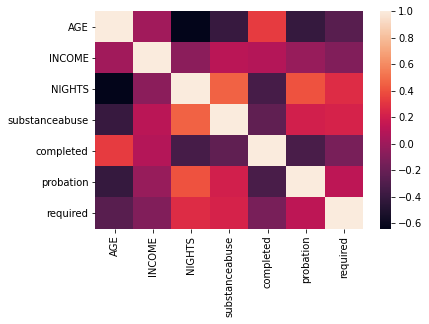

In [ ]:
# More about seaborn further down.
sns.heatmap(corr_matrix);

In [ ]:
hless_cross1 = pd.crosstab(hless['VETERAN'],hless['GENDER'])
hless_cross1.head()

GENDER   Female  Male
VETERAN              
No          170    20
Yes          26    26

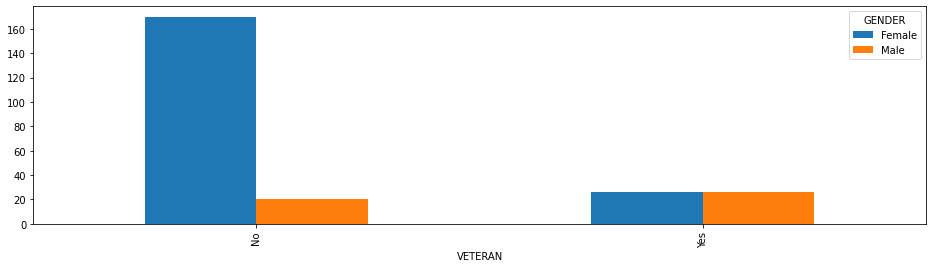

In [ ]:
hless_cross1.plot(kind='bar', figsize=(16,4));

In [ ]:
hless_cross2 = pd.crosstab(hless['GENDER'],hless['substanceabuse'])
hless_cross2.head()

substanceabuse    0   1
GENDER                 
Female          128  68
Male             38   8

substanceabuse    0   1
GENDER                 
Female          128  68
Male             38   8

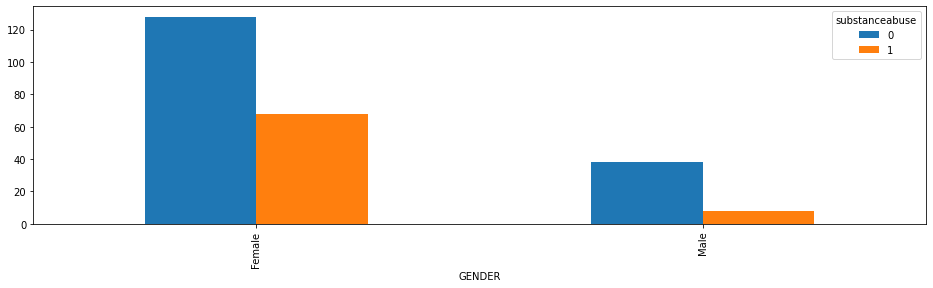

In [ ]:
hless_cross2.plot(kind='bar', figsize=(16,4));
hless_cross2

In [ ]:
hless_cross = pd.crosstab(hless['AGE'],hless['GENDER'])
hless_cross.head()

GENDER  Female  Male
AGE                 
20           4     0
21           4     0
22           8     0
23           6     0
24           4     0

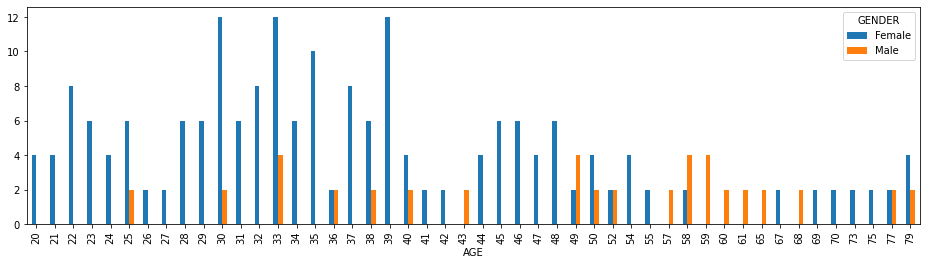

In [ ]:
# Make that into a bar chart.
hless_cross.plot(kind='bar', figsize=(16,4));

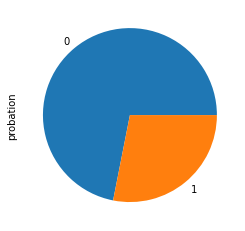

In [ ]:
# Pie chart
hless['probation'].value_counts().plot(kind='pie', figsize=(4,4));

In [ ]:
hless['s_abuse'] = hless['substanceabuse'].map({0:'No', 1: 'Yes'})
hless.head()

CLIENT_KEY  AGE  GENDER VETERAN  ...  probation  assistancetype  required  s_abuse
0      256172   20  Female      No  ...          1  tempassistance         1       No
1      221079   20  Female      No  ...          0  tempassistance         1       No
2      243074   21  Female      No  ...          0  tempassistance         1      Yes
3      129974   21  Female      No  ...          0  tempassistance         1      Yes
4      226596   22  Female      No  ...          0  tempassistance         1       No

[5 rows x 12 columns]

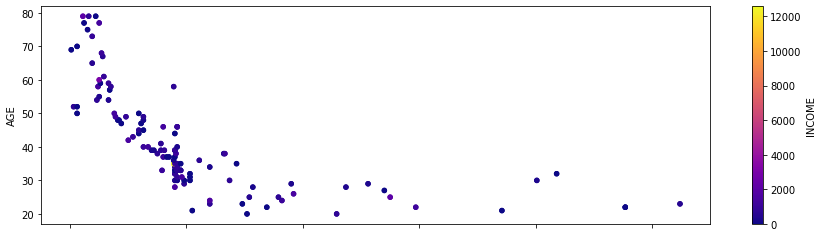

In [ ]:
# Three variables: Age, Income, and Nights (color can be either continuous or categorical here).
hless.plot(kind = 'scatter', x='INCOME', y='AGE', c='INCOME', colormap='plasma', figsize=(15,4));

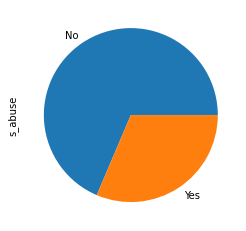

In [ ]:
hless['s_abuse'].value_counts().plot(kind='pie', figsize=(4,4));

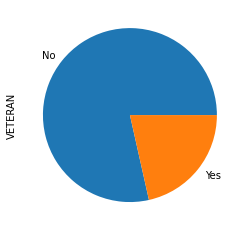

In [ ]:
hless['VETERAN'].value_counts().plot(kind='pie', figsize=(4,4));


In [ ]:
hless['probation'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      0
3      0
4      0
      ..
237    0
238    0
239    0
240    0
241    0
Name: probation, Length: 242, dtype: int64>

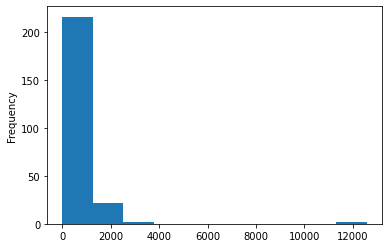

In [ ]:

hless['INCOME'].plot(kind='hist');

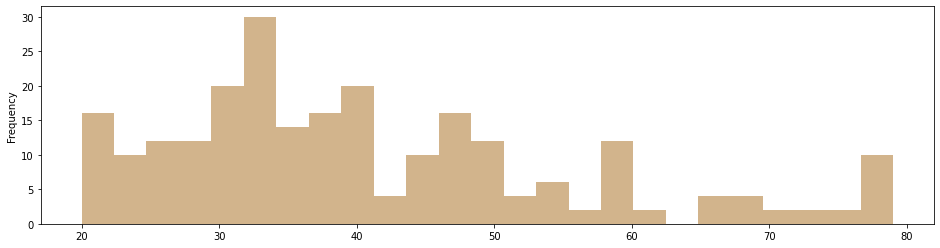

In [ ]:
hless['AGE'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

In [ ]:
hless['GENDER'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
237      Male
238    Female
239      Male
240    Female
241    Female
Name: GENDER, Length: 242, dtype: object>

In [ ]:
!wget https://www.kaggle.com/adamschroeder/homelessness/download

In [ ]:
hmnusa=pd.read_csv('2007-2016-Homelessnewss-USA.csv')

hmnusa.head()

Year State  ...                                    Measures Count
0  1/1/2007    AK  ...            Chronically Homeless Individuals   224
1  1/1/2007    AK  ...                        Homeless Individuals   696
2  1/1/2007    AK  ...                 Homeless People in Families   278
3  1/1/2007    AK  ...  Sheltered Chronically Homeless Individuals   187
4  1/1/2007    AK  ...                          Sheltered Homeless   842

[5 rows x 6 columns]

In [ ]:
print(hmnusa.shape)

(86529, 6)


In [ ]:
#convert time series
hmnusa['year'] = pd.to_datetime(hmnusa['Year']).dt.year
hmnusa[['Year','year']].head(3)

Year  year
0  1/1/2007  2007
1  1/1/2007  2007
2  1/1/2007  2007

In [ ]:
stay=pd.crosstab(hmnusa['State'], hmnusa['year'], margins=True)
stay

year   2007  2008  2009  2010  2011  2012  2013  2014   2015   2016    All
State                                                                     
AK       24    24    24    24    42    42    42    42     84     84    432
AL       96    96    96    96   168   168   168   168    336    336   1728
AR      108    72    72    60   147   126   126   126    294    294   1425
AZ       36    36    36    36    63    63    63    63    126    126    648
CA      480   480   480   492   861   861   840   840   1806   1806   8946
CO       36    36    36    36    63    63    63    63    126    126    648
CT       24    24    24    24    42    42    42    42     84     84    432
DC       12    12    12    12    21    21    21    21     42     42    216
DE       12    12    12    12    21    21    21    21     42     42    216
FL      324   324   324   324   567   567   567   567   1134   1134   5832
GA       84    84    84    84   147   147   189   189    378    378   1764
GU       12    12    12    12    21    21    21    21     42     42    216
HI       24    24    24    24    42    42    42    42     84     84    432
IA       36    36    36    36    63    63    63    63    126    126    648
ID       24    24    24    24    42    42    42    42     84     84    432
IL      240   240   240   240   420   420   420   420    840    840   4320
IN       36    36    36    36    63    63    63    63    126    126    648
KS       48    48    48    48    84    84    84    84    168    168    864
KY       36    36    36    36    63    63    63    63    126    126    648
LA      108   108   108   108   189   189   189   189    378    378   1944
MA      216   216   204   204   357   336   336   336    672    672   3549
MD      192   192   192   192   336   336   336   336    672    672   3456
ME       24    24    24    24    42    42    42    42     84     84    432
MI      252   252   252   252   441   441   441   441    882    882   4536
MN      120   120   120   120   210   210   210   210    420    420   2160
MO       96    96    96    96   168   168   168   168    336    336   1728
MS       36    36    36    36    63    63    63    63    126    126    648
MT       12    12    12    12    21    21    21    21     42     42    216
NC      144   144   144   144   252   252   252   252    504    504   2592
ND       12    12    12    12    21    21    21    21     42     42    216
NE       36    36    36    36    63    63    63    63    126    126    648
NH       36    36    36    36    63    63    63    63    126    126    648
NJ      192   192   192   192   336   336   336   336    672    630   3414
NM       24    24    24    24    42    42    42    42     84     84    432
NV       36    36    36    36    63    63    63    63    126    126    648
NY      324   300   324   324   567   567   567   546   1092   1092   5703
OH      108   108   108   108   189   189   189   189    378    378   1944
OK       96    96    96    96   168   168   168   168    336    336   1728
OR       84    84    84    84   147   147   147   147    294    294   1512
PA      180   180   180   180   336   336   336   336    672    672   3408
PR       24    24    24    24    42    42    42    42     84     84    432
RI       12    12    12    12    21    21    21    21     42     42    216
SC       48    48    48    48    84    84    84    84    168    168    864
SD       12    12    12    12    21    21    21    21     42     42    216
TN      120   120   120   120   210   210   210   210    420    420   2160
TX      132   132   132   132   231   231   231   231    462    462   2376
UT       36    36    36    36    63    63    63    63    126    126    648
VA      192   192   192   192   336   336   336   336    672    672   3456
VI       12    12    12    12    21    21    21    21     42     42    216
VT       24    24    24    24    42    42    42    42     84     84    432
WA       84    84    84    84   147   147   147   147    294    294   1512
WI       48    48    48  

In [ ]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

In [ ]:
city=pd.crosstab(hmnusa['CoC Name'], hmnusa['year'], margins=True)
city.head()

year                               2007  2008  2009  ...  2015  2016  All
CoC Name                                             ...                 
Akron/Barberton/Summit County CoC    12    12    12  ...    42    42  216
Alabama Balance of State CoC         12    12    12  ...    42    42  216
Alaska Balance of State CoC          12    12    12  ...    42    42  216
Albany City & County CoC             12    12    12  ...    42    42  216
Albuquerque CoC                      12    12    12  ...    42    42  216

[5 rows x 11 columns]

In [ ]:
#Convert to categorical variable
hmnusa['Count'] = hmnusa['Count'].astype('category').cat.codes

In [ ]:
# Mean Count.
myresults=hmnusa.groupby('State')['Count'].mean().sort_values(ascending=False).head()
myresults

State
ID    2081.083333
ND    2076.041667
MT    2043.282407
VT    2035.645833
DE    2029.217593
Name: Count, dtype: float64

In [ ]:
# display that
results = pd.crosstab(hmnusa['State'], hmnusa['year'])
results.plot(kind='bar');

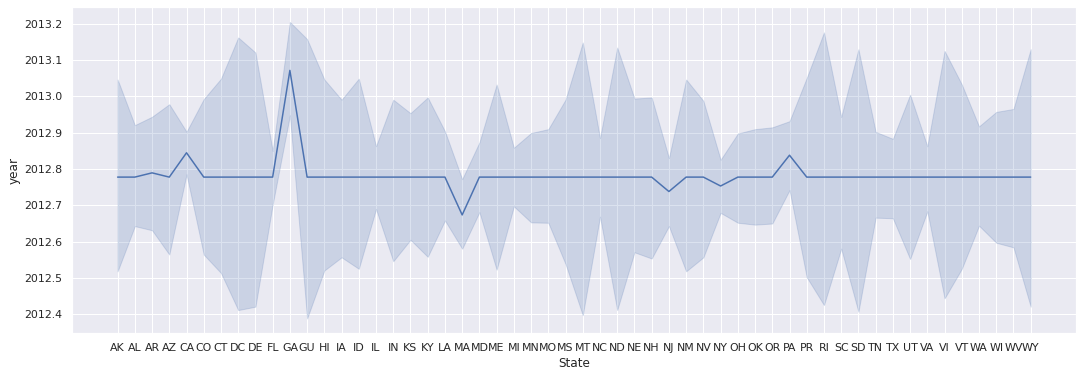

In [ ]:
# Trend over years
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x='State', y='year', data=hmnusa);

In [ ]:
hmnusa['Count'] = hmnusa['Count'].astype(float)

In [ ]:
hmnusa['Count'] = pd.to_numeric(hmnusa['Count'], errors='coerce')


In [ ]:
# for colab:
def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

In [ ]:
mycolumn='Count'
myheading1 = f"Beneath the cracks of a superpower!"
mygraphtitle = '2007-2016-Homelessness-USA'
mycolorscale = 'ylorrd' # Note: The error message will list possible color scales.
mycolorbartitle = "Hundreds"


In [ ]:
enable_plotly_in_cell()
fig = go.Figure(data=go.Choropleth(
    locations=hmnusa['State'], # Spatial coordinates
    z = hmnusa[mycolumn].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = mycolorscale,
    colorbar_title = mycolorbartitle,
))

fig.update_layout(
    title_text = mygraphtitle,
    geo_scope='usa',
    width=1200,
    height=800
)
fig.show()

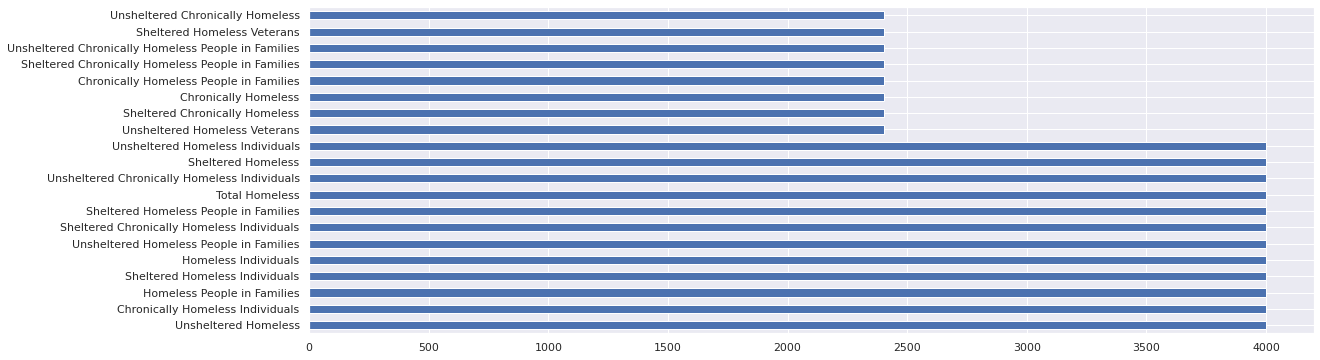

In [ ]:
#First 20 measures
hmnusa['Measures'].value_counts()[:20].plot(kind='barh');

In [ ]:
# Most frequent?
hmnusa['State'].value_counts().head(5)

# New Section

In [ ]:
# Highest ABV?
hmnusa.sort_values(by = 'State', ascending=False).head(5)

Year State  ... Count  year
86528  1/1/2016    WY  ...     0  2016
14352  1/1/2009    WY  ...  3324  2009
69632  1/1/2015    WY  ...  3101  2015
69633  1/1/2015    WY  ...  2839  2015
69634  1/1/2015    WY  ...  1013  2015

[5 rows x 7 columns]

In [ ]:
# Highest ABV?
hmnusa.sort_values(by = 'CoC Name', ascending=False).head(5)

Year State  ... Count  year
5345   1/1/2008    CA  ...  1066  2008
54607  1/1/2015    CA  ...  2383  2015
54605  1/1/2015    CA  ...  1755  2015
54604  1/1/2015    CA  ...  3112  2015
54603  1/1/2015    CA  ...  2611  2015

[5 rows x 7 columns]